# Problem
Can the sale amount for properties in Conneticut be predicted?

Also, where are the best places to buy? Best places to sell? places with the best/worst sale ratios?

Through understanding this dataset, real estate owners and sellers in Conneticut can make smart sales and purchases.

# Data Collection
Data sourced from data.gov

https://catalog.data.gov/dataset/real-estate-sales-2001-2018

In [1]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2001-2023_GL.csv')

C:\Users\jonah\AppData\Local\Temp\ipykernel_25452\216775831.py:2: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001-2023_GL.csv')


# Data Understanding

In [2]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [3]:
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1141717,230299,2023,04/19/2024,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,NaN,POINT (-72.86373 41.56032)
1141718,230568,2023,05/15/2024,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,NaN,NaN,NaN,POINT (-72.97401 41.24665)
1141719,230217,2023,02/20/2024,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,NaN,NaN,NaN,POINT (-72.88193 41.62094)
1141720,230097,2023,05/30/2024,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,NaN,NaN,DEVELOPERS LOT FOR NEW CONST,NaN,POINT (-72.30557 41.29054)
1141721,230383,2023,06/06/2024,Shelton,512 ANTELOPE TRL,306460.0,659813.0,0.4645,Residential,Condo,25 - Other,89 33 512,"PER MLS CLOSING PRICE = $675,000",POINT (-73.13448 41.29345)


High Sales ratio (< 1): sold for less than assessed value -> good for buyers, bad for sellers

Low sales ratio (> 1): sold for more than assessed value ->  bad for buyers, good for sellers 

In [4]:
df.shape

(1141722, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  object 
 3   Town              1141722 non-null  object 
 4   Address           1141671 non-null  object 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   object 
 9   Residential Type  738804 non-null   object 
 10  Non Use Code      324807 non-null   object 
 11  Assessor Remarks  181090 non-null   object 
 12  OPM remarks       14346 non-null    object 
 13  Location          341241 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 121.9+ MB


In [6]:
print('Null values:')
for col in df.columns:
    print(f'{col}: {df.shape[0]-df[col].count()}')

Null values:
Serial Number: 0
List Year: 0
Date Recorded: 2
Town: 0
Address: 51
Assessed Value: 0
Sale Amount: 0
Sales Ratio: 0
Property Type: 382446
Residential Type: 402918
Non Use Code: 816915
Assessor Remarks: 960632
OPM remarks: 1127376
Location: 800481


Values like Non Use Code, Assessor Remarks, OPM remarks, Location have over half of their entrances missing

In [7]:
for col in df.columns:
    print(f'{df[col].apply(type).value_counts()}')

Serial Number
<class 'int'>    1141722
Name: count, dtype: int64
List Year
<class 'int'>    1141722
Name: count, dtype: int64
Date Recorded
<class 'str'>      1141720
<class 'float'>          2
Name: count, dtype: int64
Town
<class 'str'>    1141722
Name: count, dtype: int64
Address
<class 'str'>      1141671
<class 'float'>         51
Name: count, dtype: int64
Assessed Value
<class 'float'>    1141722
Name: count, dtype: int64
Sale Amount
<class 'float'>    1141722
Name: count, dtype: int64
Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64
Property Type
<class 'str'>      759276
<class 'float'>    382446
Name: count, dtype: int64
Residential Type
<class 'str'>      738804
<class 'float'>    402918
Name: count, dtype: int64
Non Use Code
<class 'float'>    862445
<class 'str'>      279277
Name: count, dtype: int64
Assessor Remarks
<class 'float'>    960632
<class 'str'>      181090
Name: count, dtype: int64
OPM remarks
<class 'float'>    1127376

In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print()

Serial Number
10002      172
10010      172
10018      172
10030      171
10028      171
          ... 
2300999      1
2304031      1
2310049      1
2303018      1
2300931      1
Name: count, Length: 100983, dtype: int64

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2021    56946
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2023    44093
2022    43470
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

Date Recorded
07/01/2005    877
08/01/2005    859
07/01/2004    840
06/30/2005    828
09/30/2005    781
             ... 
05/12/2024      1
01/12/0024      1
02/04/0024      1
12/18/0023      1
08/06/0024      1
Name: count, Length: 7382, dtype: int64

Town
Bridgeport       39680
Stamford         38178
Waterbury        34186
Norwalk          27995
New Haven        24786
                 ...  
Canaan             547


# Preprocessing

## Data Cleaning

Date Recorded seems to have some values. There many rows with List Year = 2023 have years listed in 0023 and 2024. 

In [9]:
bad_dates = []
for i in range(1,13):
    month = ''
    if i < 10:
        month += '0'
    month += str(i)
    for j in range(1,32):
        day = ''
        if j < 10:
            day += '0'
        day += str(j)
        for k in range(23,25):
            bad_dates.append(f'{month}/{day}/00{k}')
            
count = 0
for bad_date in bad_dates:
    if df['Date Recorded'].isin([bad_date]).any():
        count += 1
        good_date = bad_date[:6] + '2' + bad_date[7:]
        df['Date Recorded'] = df['Date Recorded'].replace(bad_date,good_date)

df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
f'{count} bad dates'

'140 bad dates'

Sales Ratio should contain only floats, but df.info() shows it to have an object Dtype. Why is this?

In [10]:
df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64

Since this column contains floats and strings, we need to convert all of the strings to floats

In [11]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        print(x)
        return False
sales_ratio_strings = df['Sales Ratio'][df['Sales Ratio'].apply(lambda x: not isinstance(x, float))]
sales_ratio_strings.apply(is_float).value_counts()

1,787.3333


Sales Ratio
True     27609
False        1
Name: count, dtype: int64

Of all the strings in df['Sales Ratio'], there is only one which cannot be converted to a float, so we can fix this individual datapoint.

Now every element in df['Sales Ratio'] is a float

We can also convert df['Date Recorded'] to datetimes.

In [12]:
df['Sales Ratio'] = df['Sales Ratio'].replace('1,787.3333','1787.3333')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1141722 non-null  int64         
 1   List Year         1141722 non-null  int64         
 2   Date Recorded     1141720 non-null  datetime64[ns]
 3   Town              1141722 non-null  object        
 4   Address           1141671 non-null  object        
 5   Assessed Value    1141722 non-null  float64       
 6   Sale Amount       1141722 non-null  float64       
 7   Sales Ratio       1141722 non-null  float64       
 8   Property Type     759276 non-null   object        
 9   Residential Type  738804 non-null   object        
 10  Non Use Code      324807 non-null   object        
 11  Assessor Remarks  181090 non-null   object        
 12  OPM remarks       14346 non-null    object        
 13  Location          341241 non-null   object

In [13]:
missing_data = ['Address','Property Type','Residential Type','Non Use Code','Assessor Remarks','OPM remarks','Location']
for missing_datum in missing_data:
    df[missing_datum] = df[missing_datum].astype(str)

# Model Planning

In [14]:
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,nan,nan,nan,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,nan,nan,nan,nan
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,nan,nan,nan,nan,nan
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,nan,nan,nan,nan
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo,nan,nan,nan,POINT (-72.879115982 41.773452988)
5,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,nan,nan,nan,nan
6,200121,2020,2020-12-15,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,nan,nan,nan,POINT (-72.89675 41.79445)
7,20058,2020,2021-06-01,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,nan,"2003 COLONIAL, 2140 SFLA, 2.99 AC",nan,nan
8,200046,2020,2021-01-25,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,nan,nan,nan,nan
9,200016,2020,2020-11-13,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,nan,nan,nan,nan


In [15]:
df.tail(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1141712,230270,2023,2024-05-30,Westport,44 PUMPKIN HILL,1635900.0,1700000.0,0.9622,Residential,Single Family,08 - Part Interest,nan,nan,POINT (-73.33962 41.15611)
1141713,230082,2023,2023-11-30,South Windsor,612 TWIN CIRCLE DRIVE,78100.0,180000.0,0.4338,Residential,Condo,nan,nan,nan,POINT (-72.57813 41.82311)
1141714,23066,2023,2023-11-21,Newtown,6 BLACK CHERRY LANE,291810.0,375000.0,0.7781,Residential,Single Family,nan,nan,nan,POINT (-73.27256 41.42774)
1141715,230068,2023,2024-03-18,Woodstock,75 LAUREL DR,248800.0,460000.0,0.5408,Residential,Single Family,nan,nan,nan,POINT (-71.94685 41.94914)
1141716,230088,2023,2024-05-13,Woodstock,83 OAK DR,147100.0,268000.0,0.5488,Residential,Single Family,nan,nan,nan,POINT (-72.05777 41.95521)
1141717,230299,2023,2024-04-19,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,nan,POINT (-72.86373 41.56032)
1141718,230568,2023,2024-05-15,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,nan,nan,nan,POINT (-72.97401 41.24665)
1141719,230217,2023,2024-02-20,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,nan,nan,nan,POINT (-72.88193 41.62094)
1141720,230097,2023,2024-05-30,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,nan,nan,DEVELOPERS LOT FOR NEW CONST,nan,POINT (-72.30557 41.29054)
1141721,230383,2023,2024-06-06,Shelton,512 ANTELOPE TRL,306460.0,659813.0,0.4645,Residential,Condo,25 - Other,89 33 512,"PER MLS CLOSING PRICE = $675,000",POINT (-73.13448 41.29345)


In [16]:
for col in df.columns:
    print(df[col].value_counts())
    print()

Serial Number
10002      172
10010      172
10018      172
10030      171
10028      171
          ... 
2300999      1
2304031      1
2310049      1
2303018      1
2300931      1
Name: count, Length: 100983, dtype: int64

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2021    56946
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2023    44093
2022    43470
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

Date Recorded
2005-07-01    877
2005-08-01    859
2004-07-01    840
2005-06-30    828
2005-09-30    781
             ... 
2023-12-31      1
2024-06-15      1
2024-07-27      1
2024-07-13      1
2018-09-30      1
Name: count, Length: 7275, dtype: int64

Town
Bridgeport       39680
Stamford         38178
Waterbury        34186
Norwalk          27995
New Haven        24786
                 ...  
Canaan             547


In [17]:
df.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio
count,1.141722e+06,1.141722e+06,1141720,1.141722e+06,1.141722e+06,1.141722e+06
mean,5.457366e+05,2.011673e+03,2012-12-11 10:01:27.732894464,2.833275e+05,4.104510e+05,9.280820e+00
min,0.000000e+00,2.001000e+03,1999-04-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.090300e+04,2.005000e+03,2006-01-09 00:00:00,8.991000e+04,1.461000e+05,4.737000e-01
50%,9.016000e+04,2.012000e+03,2013-04-30 00:00:00,1.419800e+05,2.375000e+05,6.047582e-01
75%,1.801550e+05,2.018000e+03,2019-06-27 00:00:00,2.300600e+05,3.837500e+05,7.648571e-01
max,2.000500e+09,2.023000e+03,2024-10-02 00:00:00,8.815100e+08,5.000000e+09,1.226420e+06
std,7.450110e+06,7.018679e+00,NaN,1.656128e+06,5.048996e+06,1.766534e+03


In [18]:
df.nlargest(5, 'Sale Amount').sort_values(by = 'Sale Amount', ascending = False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
63585,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,nan,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,nan
856592,160393,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110.0,3.955000e+08,0.128496,nan,nan,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,nan,nan
858905,160389,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090.0,3.955000e+08,0.027381,nan,nan,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,nan,POINT (-73.53597 41.0442)
882179,160390,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790.0,3.955000e+08,0.027651,nan,nan,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,nan,nan
892170,160386,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510.0,3.955000e+08,0.141958,nan,nan,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,nan,POINT (-73.53568 41.04536)


In [19]:
df.nlargest(5, 'Sales Ratio').sort_values(by = 'Sales Ratio', ascending = False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
478279,60043,2006,2007-03-19,Salisbury,209 MAIN ST,1226420.0,1.0,1226420.0,Single Family,Single Family,29 - No Consideration,nan,nan,POINT (-73.43333 41.97247)
417869,50186,2005,2006-05-16,New Fairfield,2 MISTY BRK LN,611900.0,1.0,611900.0,nan,nan,25,nan,nan,POINT (-73.46903 41.52945)
361096,40089,2004,2004-10-29,Westport,33 MAYFLOWER PKY,594000.0,1.0,594000.0,nan,nan,1,nan,nan,nan
390655,50316,2005,2006-07-21,Brookfield,30 ROLLINGWOOD DR,519130.0,1.0,519130.0,nan,nan,29,nan,nan,nan
480988,60190,2006,2007-03-02,Newtown,17 WHITEWOOD RD,473780.0,1.0,473780.0,Single Family,Single Family,29 - No Consideration,nan,nan,nan


In [20]:
df.nsmallest(5, 'Sales Ratio').sort_values(by = 'Sales Ratio', ascending = True)
#df.sort_values(by = 'Sales Ratio', ascending = True).head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
545,210381,2021,2022-09-28,Berlin,171 SCENIC DR,0.0,453120.0,0.0,Residential,Condo,07 - Change in Property,nan,nan,POINT (-72.719074019 41.635737019)
1207,210304,2021,2022-03-17,Branford,11 SCHOOL GROUND RD LOT 5,0.0,70500.0,0.0,Residential,Single Family,07 - Change in Property,MOBILE HOME ONLY/NEW CONSTRUCTION,nan,POINT (-72.765365007 41.301060995)
1489,21006,2021,2021-10-12,Burlington,29 COVEY RD UNIT 21,0.0,327400.0,0.0,Residential,Condo,07 - Change in Property,NOT BUILT AS OF OCT 1 2021,nan,POINT (-72.963717968 41.772190003)
1579,210975,2021,2022-06-10,Bristol,410 EMMET ST GARAGE G-Q,0.0,26000.0,0.0,Residential,Condo,25 - Other,SALE OF A ONE CAR DETACHED GARAGE WITHIN A CON...,nan,POINT (-72.909248002 41.661366993)
2195,210332,2021,2022-08-16,Cromwell,23 BLUESTEM BLVD,0.0,689925.0,0.0,Residential,Condo,07 - Change in Property,NEW CONST,nan,POINT (-72.6535 41.61653)


It seems that the properties with the lowest Sales ratios had an Assessed Value of 0.0. Since Sales Ratio = Assessed Value/Sale amount, the value of a sale with Assessed Value = 0.0 needs to be determined using sale amount

In [21]:
df[df['Assessed Value'] == 0.0].sort_values(by = 'Sale Amount', ascending = False).head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
458400,50314,2005,2006-09-29,Suffield,49 CEDAR CREST LN,0.0,76088165.0,0.0,nan,nan,7,nan,nan,POINT (-72.62858 42.02315)
257569,30365,2003,2004-06-23,East Lyme,BOSTON POST RD 100 LTS,0.0,47000000.0,0.0,nan,nan,24.0,nan,nan,nan
807207,150132,2015,2015-11-24,New Haven,350 GEORGE STREET,0.0,16500000.0,0.0,nan,nan,07 - Change in Property,property split,nan,nan
205307,20374,2002,2002-12-20,Hartford,100 WELLS ST,0.0,15600000.0,0.0,nan,nan,6.0,nan,nan,nan
467715,60179,2006,2007-04-02,Rocky Hill,400 CAPITAL BLVD,0.0,15450000.0,0.0,nan,nan,06 - Portion of Property,nan,nan,POINT (-72.66432 41.64732)


Do scaling here

# Model Building

## Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

column_trans = ColumnTransformer(
    [
        (
            'encode', 
            OrdinalEncoder(
                handle_unknown='use_encoded_value', 
                unknown_value=-1,
            ),
            [
                'Property Type',
                'Residential Type',
                'Town',
                'Non Use Code',
                'Location',
                'Address',
                'Assessor Remarks',
                'OPM remarks',
            ]
        ),
        (
            'scale',
            StandardScaler(),
            [
                'Date Recorded',
                'Assessed Value'
            ]
        )
    ]
)

pipe = Pipeline(
    steps=[
        (
            'preprocess',
            column_trans,
        ),
        (
            'clf',
            LinearRegression(),
        ),
    ],  
)
model = pipe

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Serial Number','Sales Ratio','Sale Amount'],axis = 1)

'''
def debug_map(x):
    if pd.notnull(x):
        res = x.toordinal()
        if not isinstance(res,int):
            print(res)
            print(type(res))
        return res
    return -1'''

#X['Date Recorded'] = X['Date Recorded'].map(debug_map)

X['Date Recorded'] = X['Date Recorded'].map(lambda x: x.toordinal() if pd.notnull(x) else -1)

y = df['Sales Ratio']

#X[discrete_categories] = encoder.fit_transform(X[discrete_categories])

#X[continuous_categories] = scaler.fit_transform(X[continuous_categories])

X.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020,737894,Ansonia,323 BEAVER ST,133000.0,Residential,Single Family,nan,nan,nan,POINT (-73.06822 41.35014)
1,2020,737936,Ansonia,152 JACKSON ST,110500.0,Residential,Three Family,nan,nan,nan,nan
2,2020,738046,Ansonia,230 WAKELEE AVE,150500.0,Commercial,nan,nan,nan,nan,nan
3,2020,737773,Ansonia,57 PLATT ST,127400.0,Residential,Two Family,nan,nan,nan,nan
4,2021,738326,Avon,12 BYRON DRIVE,179990.0,Residential,Condo,nan,nan,nan,POINT (-72.879115982 41.773452988)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Results

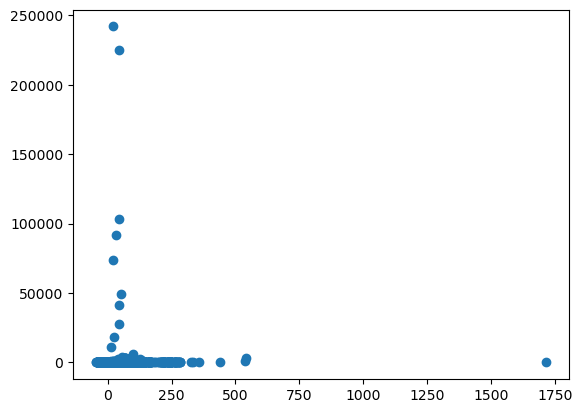

In [25]:
from matplotlib import pyplot as plt
plt.scatter(y_pred,y_test)